### Part D

install and import required libraries

In [1]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("limma")
BiocManager::install("edgeR")
install.packages("ggplot2")

library('limma')
library('edgeR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'limma'

also installing the dependency ‘statmod’


Old packages: 'bit', 'curl', 'DBI', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'rvest', 'textshaping', 'whisker', 'xfun', 'zip', 'boot',
  'nlme', 'survival'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'edgeR'

also installing the dependencies ‘locfit’, ‘Rcpp’


Old packages: 'bit', 'curl', 'DBI', 'd

Read gene expression matrix

In [11]:
gene_expression_matrix <- read.table('GSE104836_gene_exp.txt', header = TRUE, sep = "\t", stringsAsFactors = FALSE)

gene_expression_matrix <- gene_expression_matrix[,c("gene" ,"X101C_COUNT" , "X101N_COUNT" , "X111C_COUNT" ,"X111N_COUNT" , "X112C_COUNT" ,"X112N_COUNT", "X29C_COUNT" , "X29N_COUNT"
, "X34C_COUNT" , "X34N_COUNT" , "X48C_COUNT", "X48N_COUNT" , "X55C_COUNT" , "X55N_COUNT" , "X57C_COUNT" , "X57N_COUNT","X91C_COUNT" , "X91N_COUNT" , "X94C_COUNT" , "X94N_COUNT")]

group = c("Tumor", "Normal", "Tumor" , "Normal", "Tumor" ,"Normal", "Tumor" , "Normal", "Tumor","Normal", "Tumor", "Normal", "Tumor" ,
"Normal", "Tumor" ,"Normal", "Tumor" , "Normal", "Tumor","Normal")

In [9]:
head(gene_expression_matrix,1)

,gene,X101C_COUNT,X101N_COUNT,X111C_COUNT,X111N_COUNT,X112C_COUNT,X112N_COUNT,X29C_COUNT,X29N_COUNT,X34C_COUNT,⋯,X48C_COUNT,X48N_COUNT,X55C_COUNT,X55N_COUNT,X57C_COUNT,X57N_COUNT,X91C_COUNT,X91N_COUNT,X94C_COUNT,X94N_COUNT
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,A1BG,64,208,98,92,109,168,169,87,97,⋯,74,112,108,80,67,116,71,110,27,43


calculating

In [15]:
dge <- DGEList(counts = gene_expression_matrix[, -1], genes = gene_expression_matrix[, 1] , group=group)
keep <- filterByExpr(dge)
dge <- dge[keep,, keep.lib.sizes=FALSE]
dge <- calcNormFactors(dge)
design <- model.matrix(~ group)

In [16]:
dge <- estimateDisp(dge, design)
fit <- glmQLFit(dge, design)
qlf <- glmQLFTest(fit, coef=2)
results <- topTags(qlf, n=Inf)
de_genes <- results$table[results$table$FDR < 0.05 & abs(results$table$logFC) > log2(1.5), ]

In [17]:
print(de_genes)
write.csv(de_genes, "de_genes.csv")

                   genes      logFC        logCPM          F       PValue
22686           KIAA1199  3.6580736  5.3738989687 225.604097 4.302946e-13
3118                CDH3  5.4934358  4.4505660876 156.591198 1.625236e-11
35271              TRIB3  3.8113518  4.5776076991 155.067144 1.787809e-11
3763             COL11A1  5.8367580  4.5706352384 137.575726 5.688282e-11
5476                ENC1  1.6161603  6.7007391195 131.399065 8.827704e-11
34739           TMEM132A  2.5306804  4.2317807174 129.879804 9.862358e-11
36371               WNT2  5.5479441  2.2140973407 128.022337 1.131076e-10
4171              CTHRC1  4.0242169  3.9564689389 117.524426 2.537729e-10
31719              SALL4  3.2868729  0.9471045434 115.786466 2.918129e-10
4100                CST1  6.5720395  2.6077269521 106.203935 6.517229e-10
140                 ACAN  4.1784926  3.1246081608 105.820662 6.738481e-10
9104   ENSG00000232803.1  3.2575395  2.7218993148 104.773281 7.385993e-10
32742            SLCO4A1  3.2755590  4

Number of genes

In [20]:
total_genes <- nrow(dge)
print(total_genes)

[1] 23675


Number of differentially expressed gened

In [22]:
significant_genes <- sum(results$table$FDR < 0.05 & abs(results$table$logFC) > log2(1.5))
print(significant_genes)

[1] 6224


Percentage of differentially expressed genes

In [24]:
percentage_de_genes <- (significant_genes / total_genes) * 100
print(percentage_de_genes)

[1] 26.28933


Plot the result

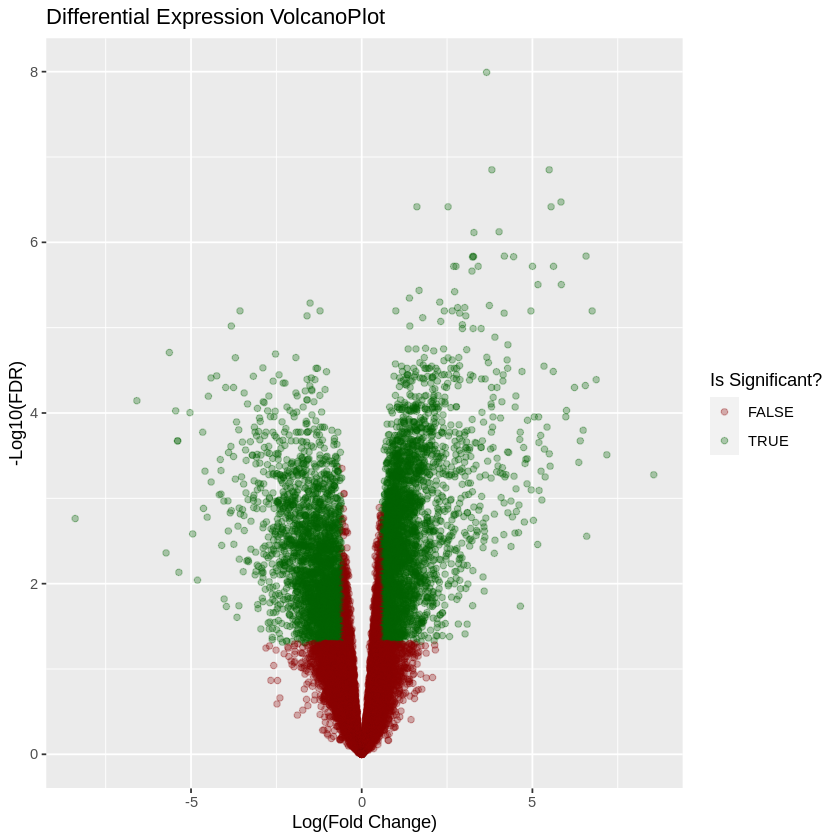

In [25]:
library("ggplot2")
results_df <- as.data.frame(results$table)
results_df$gene <- rownames(results_df)
results_df$Significant <- results_df$FDR < 0.05 & abs(results_df$logFC) > log2(1.5)
plt <- ggplot(results_df, aes(x = logFC, y = -log10(FDR), color = Significant)) +
            geom_point(alpha = 0.3) +
            scale_color_manual(values = c("darkred", "darkgreen")) +
            labs(
            title = "Differential Expression",
            x = "Log(Fold Change)",
            y = "-Log10(FDR)",
            color = "Is Significant?") +
            theme(legend.position = "right")

plt + theme_gray()


# Part E

install and import libraries

In [ ]:
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("goseq")
library(goseq)

if (!require("rtracklayer", quietly = TRUE))
  install.packages("rtracklayer")
library(rtracklayer)

if (!require("R.utils", quietly = TRUE))
  install.packages("R.utils")
library(R.utils)

unzipping gtf file

In [ ]:
gunzip("Homo_sapiens.GRCh38.106.chr.gtf.gz", destname = "./Homo_sapiens.GRCh38.106.chr.gtf")

reading gtf file

In [ ]:
gtf <- readGFF("Homo_sapiens.GRCh38.106.chr.gtf")
length <- as.vector(dim(gtf)[2])

choose genes

In [ ]:
de <- gene_id %in% gtf

Go enrichment

In [ ]:
pwf = nullp(de,"hg19", "ensGene")

enriched_GO <- goseq(
    gene2cat = gtf,
    method = "Wallenius",
    pwf = pwf
)

Extract significant GO terms and KEGG terms

In [ ]:
significant_terms <- subset(enriched_GO, PLE <= 0.05)
significant_KEGG <- enriched_GO$over_represented_Kegg_pathways

Plot Biological Process

In [ ]:
ggplot(significant_terms[significant_terms$category == "BP", ], aes(x = description, y = PLE)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    labs(x = "Biological Process", y = "PLE")

Plot Molecular Function

In [ ]:
ggplot(significant_terms[significant_terms$category == "MF", ], aes(x = description, y = PLE)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    labs(x = "Molecular Function", y = "PLE")

Plot Cellular Component

In [ ]:
ggplot(significant_terms[significant_terms$category == "CC", ], aes(x = description, y = PLE)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    labs(x = "Cellular Component", y = "PLE")

Plot KEGG

In [ ]:
significant_KEGG_df <- data.frame(KEGG_Term = names(significant_KEGG), Significance = significant_KEGG)


ggplot(significant_KEGG_df, aes(x = KEGG_Term, y = Significance)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Significant KEGG Terms",
       x = "KEGG Terms",
       y = "Significance") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))